# Markov Google

This notebook uses Markov Chains to find the PageRank of a network.  

The user must supply the adjacency matrix. 

Created by Tim Chartier. 

In [13]:
import sys
!{sys.executable} -m pip install numpy matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import numpy as np

### Create adjacency matrix

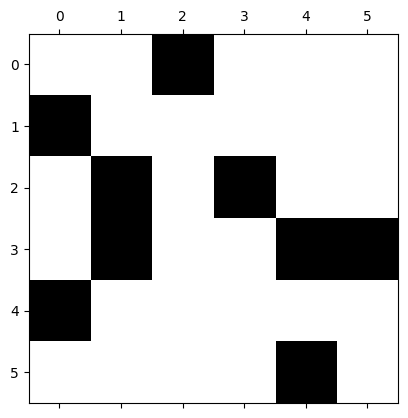

In [15]:
A = np.array([
    [0,0,1,0,0,0],
    [1,0,0,0,0,0],
    [0,1,0,1,0,0],
    [0,1,0,0,1,1],
    [1,0,0,0,0,0],
    [0,0,0,0,1,0]
    ])

# Spy plot the matrix
import matplotlib.pylab as plt
message = plt.spy(A)

### Construct the Google matrix

In [16]:
# Grab the size of the network
sizeOfNetwork = len(A)
# Remove loops (links to one's own webpage)
A = A - np.diag(np.diag(A))

In [17]:
alpha = 0.85 # teleportation parameter
rowSum = np.sum(A,1) # Compute the row sums
G = np.zeros((sizeOfNetwork,sizeOfNetwork)) # initalize the Google matrix 
for i in range(sizeOfNetwork):
    if (rowSum[i] == 0): # dangling node
       G[i,:] = np.ones((1,sizeOfNetwork))/sizeOfNetwork
    else:
       G[i,:] = alpha*A[i,:]/rowSum[i] + (1-alpha)/sizeOfNetwork
print('G = \n',G)

G = 
 [[0.025      0.025      0.875      0.025      0.025      0.025     ]
 [0.875      0.025      0.025      0.025      0.025      0.025     ]
 [0.025      0.45       0.025      0.45       0.025      0.025     ]
 [0.025      0.30833333 0.025      0.025      0.30833333 0.30833333]
 [0.875      0.025      0.025      0.025      0.025      0.025     ]
 [0.025      0.025      0.025      0.025      0.875      0.025     ]]


### Loop to compute PageRank

In [18]:
numberOfLoops = 100
v0 = np.zeros(sizeOfNetwork) # initial state
v0[np.random.randint(sizeOfNetwork)] = 1 # create a random webpage on which to start
v = v0
for i in range(numberOfLoops):
    v = v@G

### Sort and print PageRank

In [19]:
iSort = np.argsort(-v)   # the -v gives us a reverse sort and np.argsort gives us the indices of the sort
print('Page  PageRank  \n===============')
for i in range(sizeOfNetwork):
    print(f'{iSort[i]:3d}   {v[iSort[i]]:7.5f}')

Page  PageRank  
  0   0.26753
  2   0.25240
  1   0.16975
  3   0.13227
  4   0.11558
  5   0.06248


### Graph the PageRank

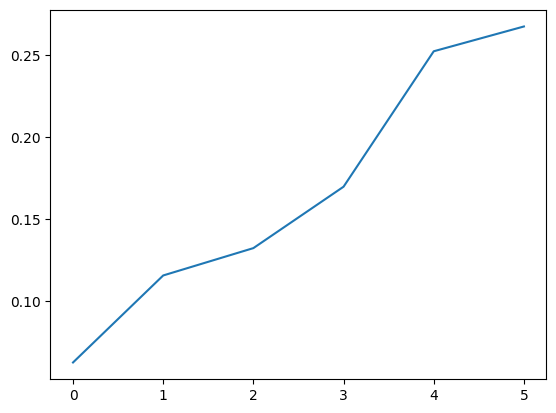

In [20]:
import matplotlib.pyplot as plt
plt.plot(sorted(v))
plt.show()